In [34]:
# Importing Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

In [2]:
# Read dataset
df = pd.read_csv(r"/content/gender_classification_v7.csv")
pd.set_option('display.max_column',25)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

* Handling Null Values

In [7]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


* Check for duplicates

In [8]:
df.duplicated().sum()

1768

In [9]:
df.drop_duplicates(inplace=True)

* Check for data types

In [10]:
df.dtypes

,0
long_hair,int64
forehead_width_cm,float64
forehead_height_cm,float64
nose_wide,int64
nose_long,int64
lips_thin,int64
distance_nose_to_lip_long,int64
gender,object


# EDA

In [11]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,Male
4990,1,12.6,5.7,0,0,1,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female


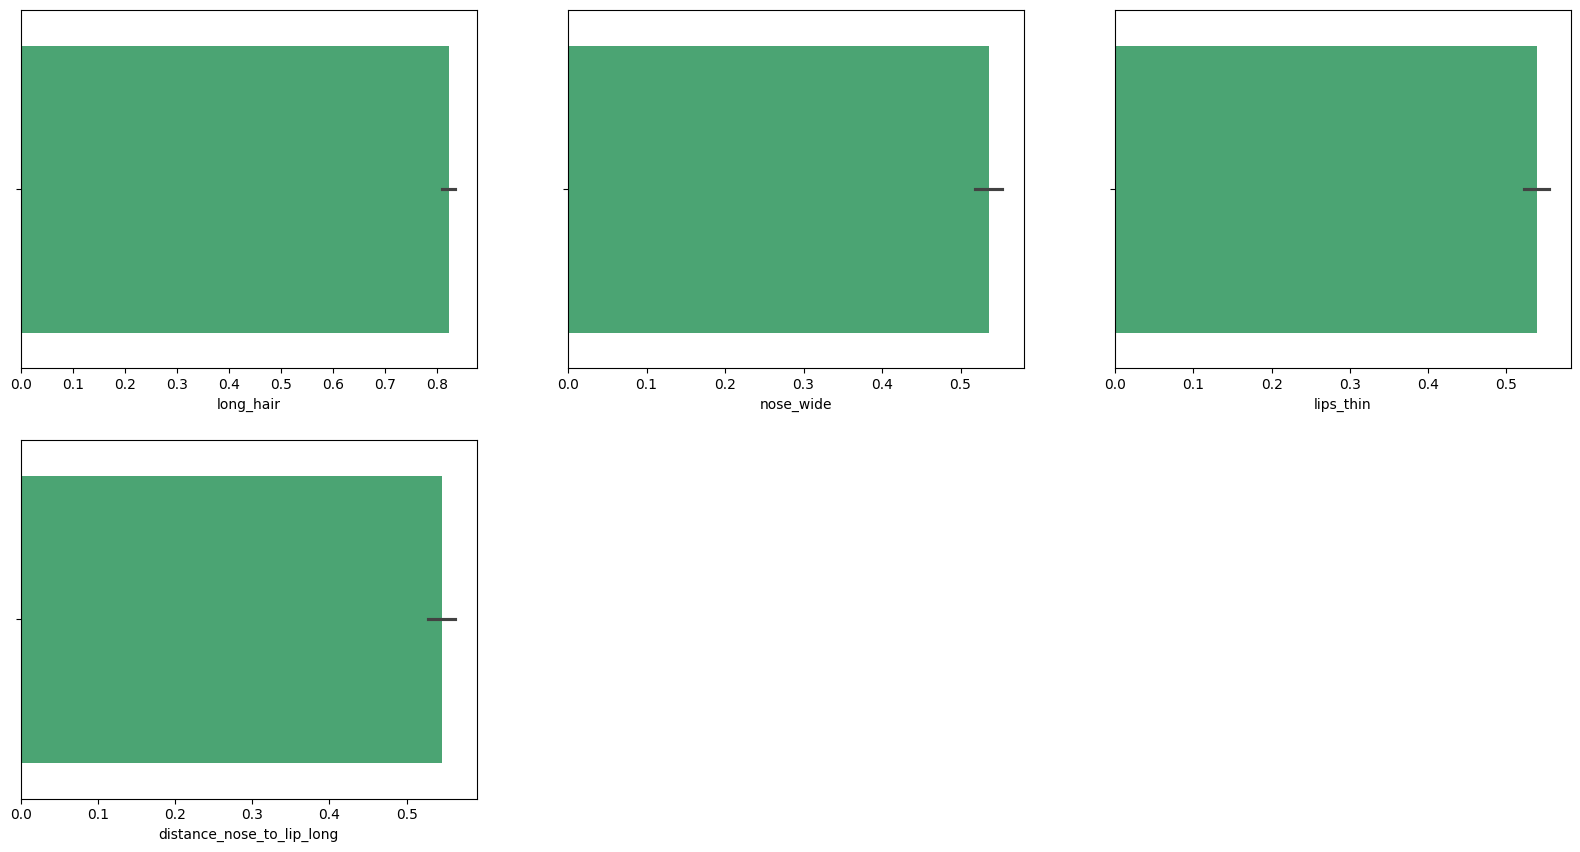

In [12]:
Numerical = ['long_hair','nose_wide','lips_thin','distance_nose_to_lip_long']

fig = plt.figure (figsize = [20 ,27])
for i in enumerate (Numerical):
    plt.subplot(5,3,i[0]+1)
    sns.barplot(x = i[1],data = df , color='#3CB371')

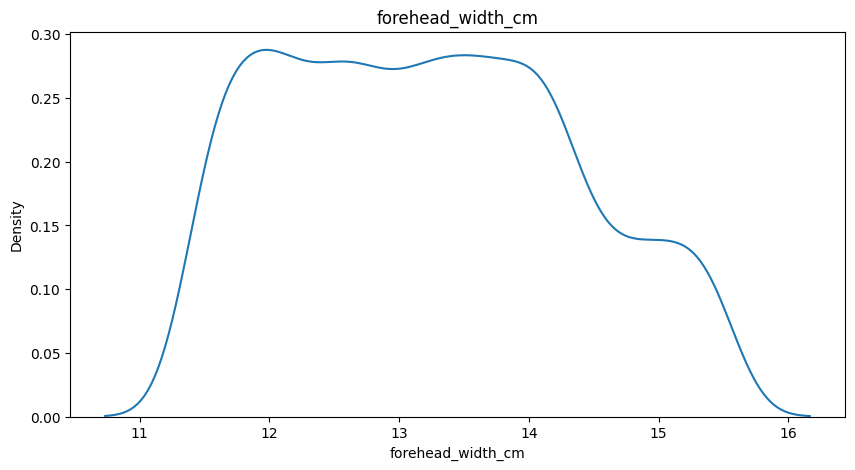

In [13]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['forehead_width_cm'])
plt.title('forehead_width_cm')
plt.show()

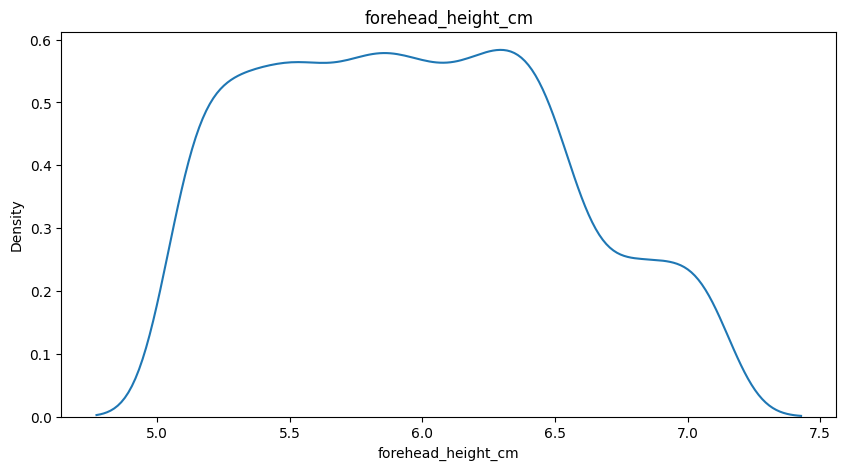

In [14]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['forehead_height_cm'])
plt.title('forehead_height_cm')
plt.show()

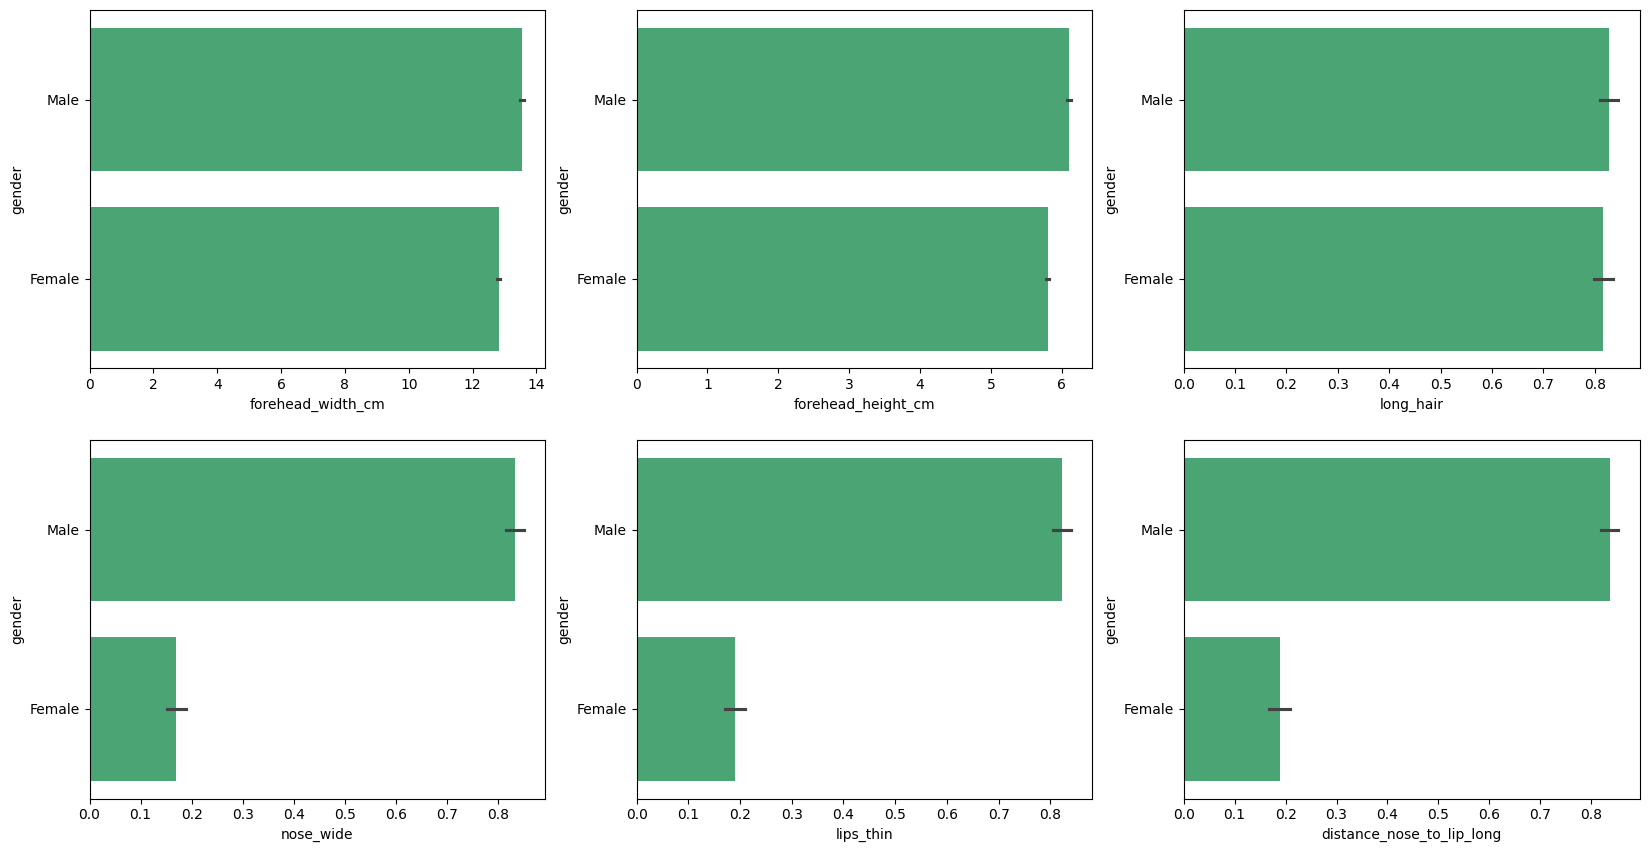

In [15]:
Numerical = ['forehead_width_cm','forehead_height_cm','long_hair','nose_wide','lips_thin','distance_nose_to_lip_long']

fig = plt.figure (figsize = [20 ,27])
for i in enumerate (Numerical):
    plt.subplot(5,3,i[0]+1)
    sns.barplot(x = i[1],y = 'gender',data = df , color='#3CB371')

* majority of the males have nose wider than females
* majority o males have thinner lips
* distance between nose to lip is longer in males

<ipython-input-16-561ca6bbf5c7>:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x = i[1],y = 'gender',data = df , color='red',hue='distance_nose_to_lip_long')
<ipython-input-16-561ca6bbf5c7>:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x = i[1],y = 'gender',data = df , color='red',hue='distance_nose_to_lip_long')
<ipython-input-16-561ca6bbf5c7>:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x = i[1],y = 'gender',data = df , color='red',hue='distance_nose_to_lip_long')
<ipython-input-16-561ca6bbf5c7>:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for

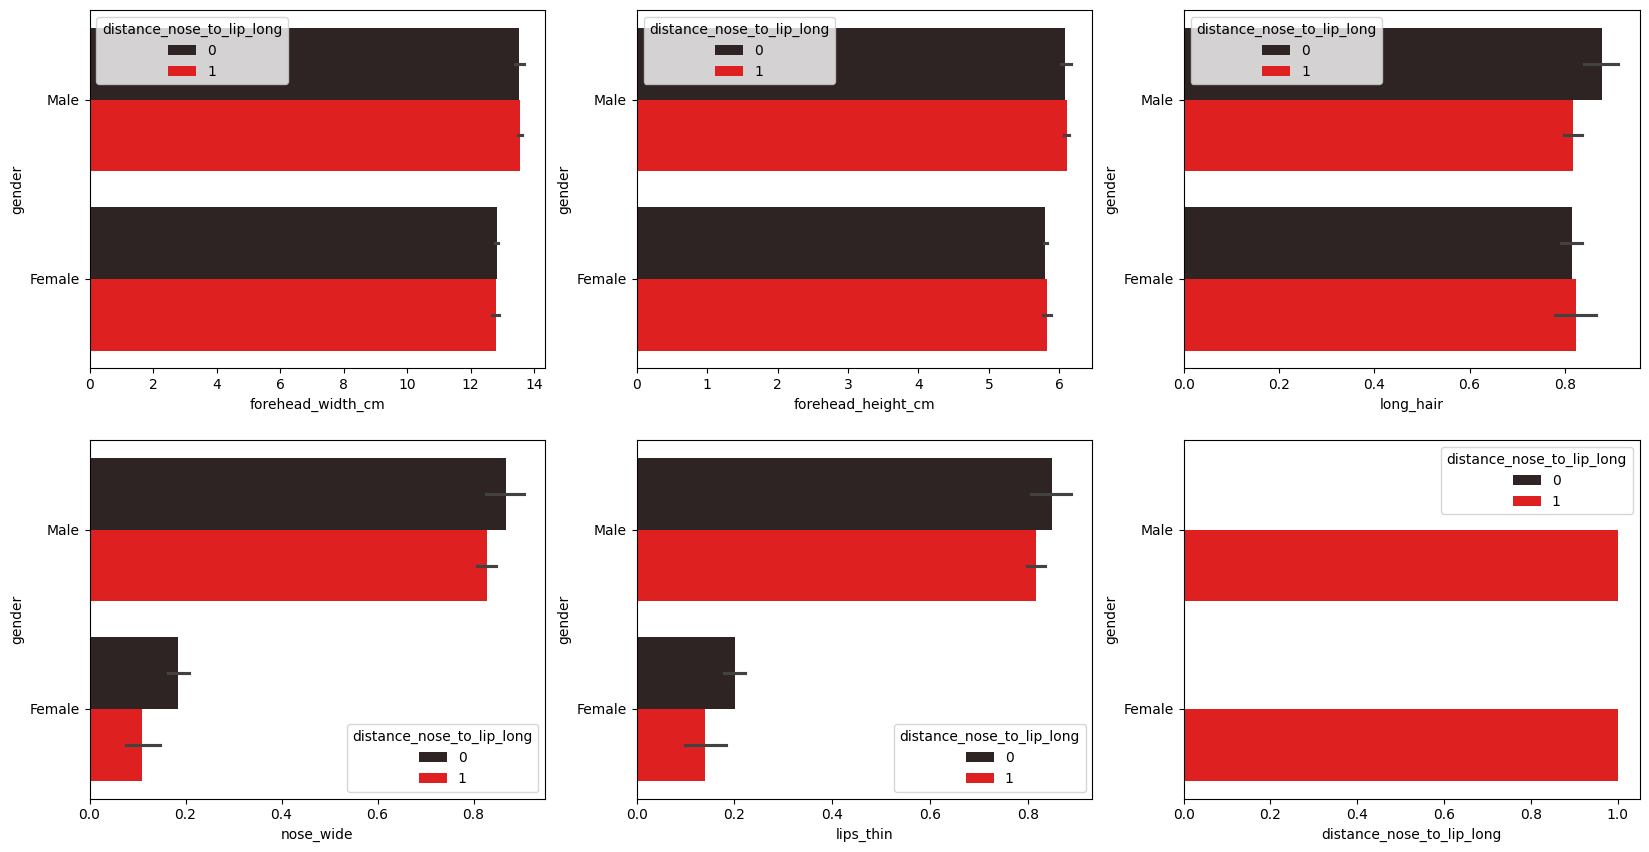

In [16]:
Numerical = ['forehead_width_cm','forehead_height_cm','long_hair','nose_wide','lips_thin','distance_nose_to_lip_long']

fig = plt.figure (figsize = [20 ,27])
for i in enumerate (Numerical):
    plt.subplot(5,3,i[0]+1)
    sns.barplot(x = i[1],y = 'gender',data = df , color='red',hue='distance_nose_to_lip_long')

# Feature Engineering

In [17]:
# encoding
from sklearn.preprocessing import LabelEncoder

colums_binary=[]
for i in df:
    if df[i].nunique()==2:
        colums_binary.append(i)
colums_binary

['long_hair',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long',
 'gender']

In [18]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,Male
4990,1,12.6,5.7,0,0,1,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female


In [19]:
lb=LabelEncoder()
df['gender'] = lb.fit_transform(df['gender'])

In [20]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,1
4990,1,12.6,5.7,0,0,1,0,0
4992,1,14.1,7.0,1,1,1,1,1
4993,1,11.6,5.9,0,0,0,1,0


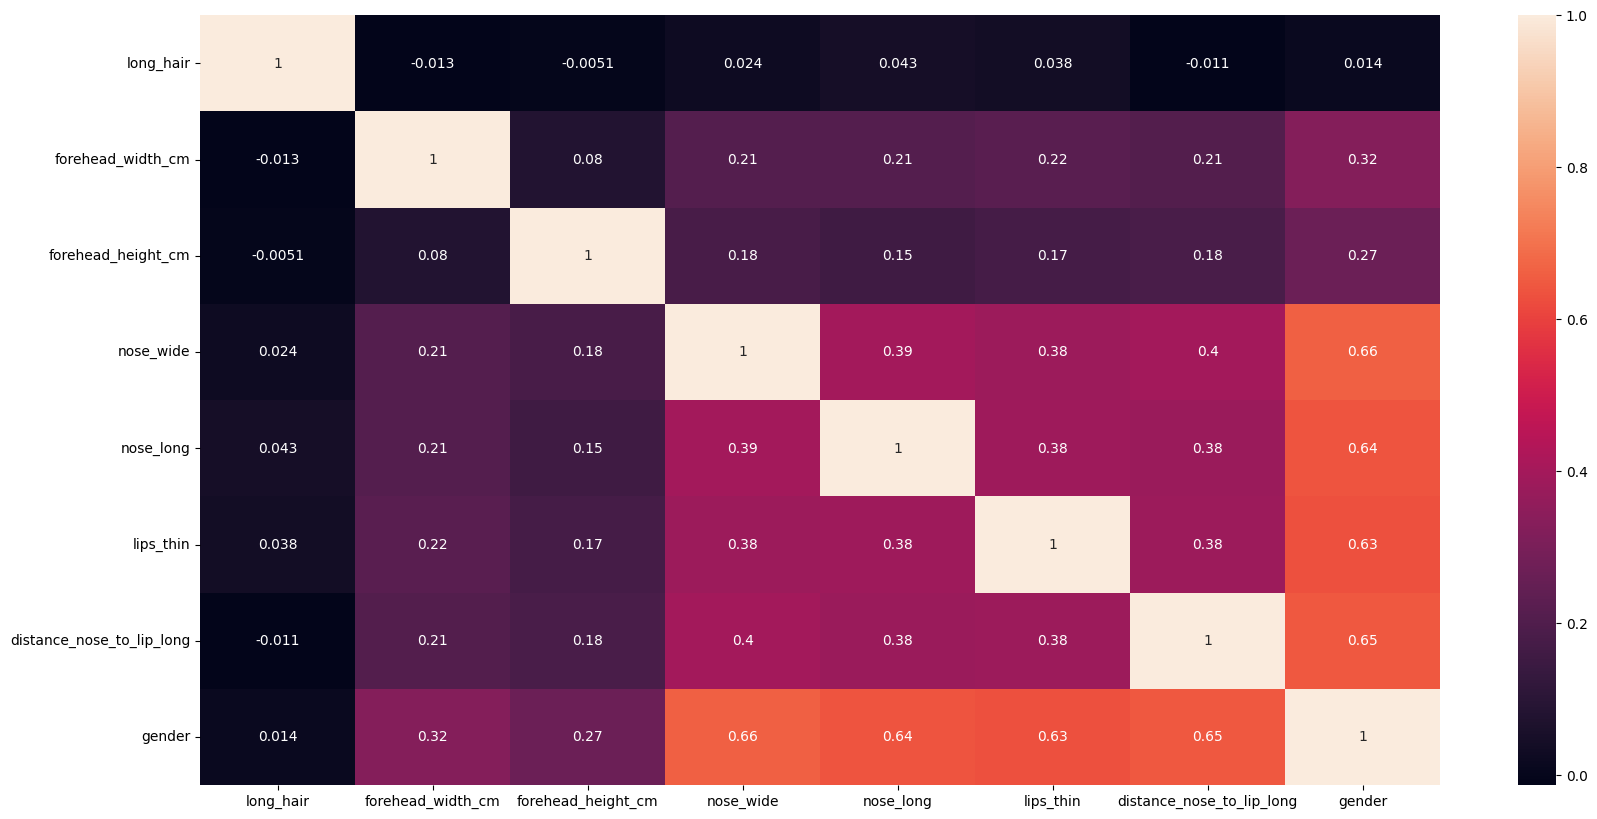

In [21]:
# Checking for Correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
high_corr_colms=[]
for i in df:
    corr = df['gender'].corr(df[i])
    if corr > 0.5 or corr <-0.5:
        high_corr_colms.append(i)
high_corr_colms

['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']

In [23]:
df = df[high_corr_colms]

In [24]:
df

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0,1,1,1
1,0,0,1,0,0
2,1,1,1,1,1
3,0,1,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
4986,1,1,0,1,1
4990,0,0,1,0,0
4992,1,1,1,1,1
4993,0,0,0,1,0


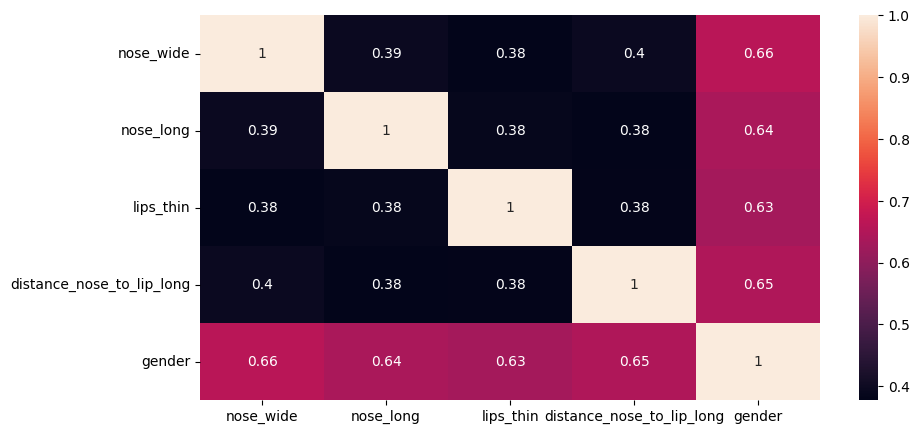

In [25]:
# Checking for Multicollinearity
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [26]:
multicol = {}
for i in df:
    col = []
    for j in df:
        corr = df[i].corr(df[j])
        if i!=j and corr > 0.5 and i!='gender' and j!='gender':
            col.append(j)
    multicol[i]=col

for i in multicol:
    print(f"{i} : {multicol[i]}")


nose_wide : []
nose_long : []
lips_thin : []
distance_nose_to_lip_long : []
gender : []


In [27]:
df

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0,1,1,1
1,0,0,1,0,0
2,1,1,1,1,1
3,0,1,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
4986,1,1,0,1,1
4990,0,0,1,0,0
4992,1,1,1,1,1
4993,0,0,0,1,0


In [28]:
x = df.drop('gender',axis=1)
y = df['gender']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train.shape

(2586, 4)

In [31]:
df.shape

(3233, 5)

In [32]:
x_test.shape

(647, 4)

In [33]:
from sklearn.naive_bayes import GaussianNB

In [35]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

In [38]:
grid_search = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [39]:
grid_search.best_params_

{'var_smoothing': 1e-09}

In [42]:
gb=GaussianNB(var_smoothing=1e-09)

In [43]:
gb.fit(x_train, y_train)

GaussianNB()

In [44]:
gb.score(x_train,y_train)

0.9323279195668986

In [45]:
gb.score(x_test,y_test)

0.9319938176197836

In [49]:
y_pred = gb.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9319938176197836
Confusion Matrix:
 [[305   3]
 [ 41 298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       308
           1       0.99      0.88      0.93       339

    accuracy                           0.93       647
   macro avg       0.94      0.93      0.93       647
weighted avg       0.94      0.93      0.93       647

